In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Ames_Housing_Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Ames_Housing_Data.csv'

#outlier identifier examples

In [ ]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    return sample_ages

In [ ]:
sample = create_ages()

In [ ]:
sample

In [ ]:
sns.displot(sample,bins=20)

In [ ]:
sns.boxplot(sample)

In [ ]:
ser = pd.Series(sample)

In [ ]:
ser.describe()

In [ ]:
IQR = 55.25000 - 42

In [ ]:
lower_limit = 42 - 1.5*(IQR)
lower_limit

In [ ]:
ser[ser > lower_limit]

In [ ]:
q75,q25 = np.percentile(sample,[75,25])
iqr = q75-q25
iqr

In [ ]:
df.select_dtypes(include=np.number).corr()['SalePrice'].sort_values()

In [ ]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [ ]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

In [ ]:
drop_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [ ]:
df = df.drop(drop_index,axis=0)

#Missing Data

In [ ]:
with open('../content/sample_data/Ames_Housing_Feature_Description.txt','r') as f:
  print(f.read())

In [ ]:
df = pd.read_csv('/content/sample_data/Ames_outliers_removed.csv')

In [ ]:
df.head()

In [ ]:
df = df.drop("PID",axis = 1)

In [ ]:
df.isnull().sum()

In [ ]:
100 * df.isnull().sum() / len(df)

In [ ]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan >0].sort_values()

  return percent_nan


In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [ ]:
percent_nan[percent_nan < 1]

In [ ]:
df[df['Electrical'].isnull()]['Garage Area']

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

In [ ]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan[percent_nan<1]

In [ ]:
df[df['Bsmt Half Bath'].isnull()]

In [ ]:
df[df['Bsmt Full Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [ ]:
df[df['Bsmt Unf SF'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [ ]:
# numeric columns
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# string columns
bsmt_char_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_char_cols] = df[bsmt_char_cols].fillna('None')

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan[percent_nan<1]

,0
Garage Cars,0.034165
Electrical,0.034165
Garage Area,0.034165
Mas Vnr Area,0.785787


In [ ]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')



In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Garage Cars'),
  Text(1, 0, 'Electrical'),
  Text(2, 0, 'Garage Area'),
  Text(3, 0, 'Mas Vnr Area'),
  Text(4, 0, 'Garage Yr Blt'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Mas Vnr Type'),
  Text(8, 0, 'Fence'),
  Text(9, 0, 'Alley'),
  Text(10, 0, 'Misc Feature'),
  Text(11, 0, 'Pool QC')])

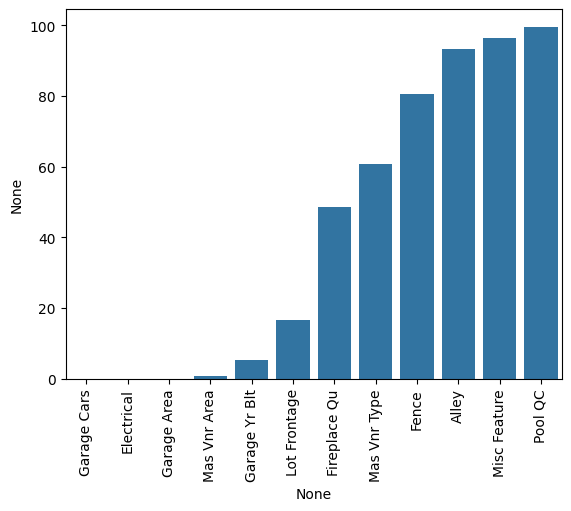

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


#Missing Data: Feature Columns

In [ ]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

,0
Electrical,0.034165
Garage Cars,0.034165
Garage Area,0.034165
Garage Yr Blt,5.432183
Lot Frontage,16.740690
Fireplace Qu,48.582166
Fence,80.457807
Alley,93.235395
Misc Feature,96.412709
Pool QC,99.590024


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'Garage Area'),
  Text(3, 0, 'Garage Yr Blt'),
  Text(4, 0, 'Lot Frontage'),
  Text(5, 0, 'Fireplace Qu'),
  Text(6, 0, 'Fence'),
  Text(7, 0, 'Alley'),
  Text(8, 0, 'Misc Feature'),
  Text(9, 0, 'Pool QC')])

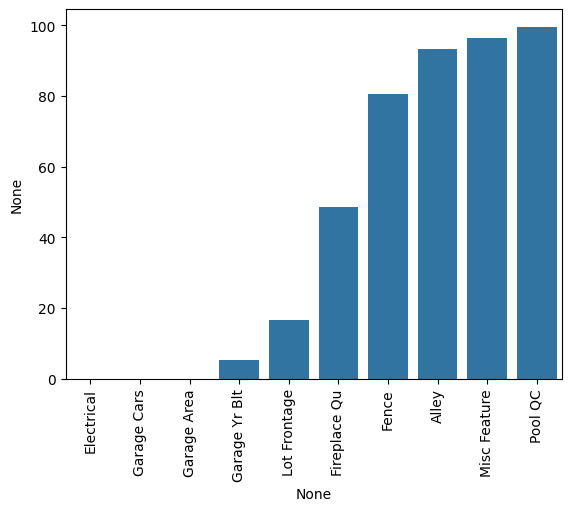

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'], axis = 1)

In [ ]:
df['Fireplace Qu'].value_counts()

,count
Fireplace Qu,
Gd,741
TA,600
Fa,75
Po,46
Ex,43


In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [ ]:
df['Lot Frontage'].value_counts()

,count
Lot Frontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
...,...
168.0,1
111.0,1
131.0,1


<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

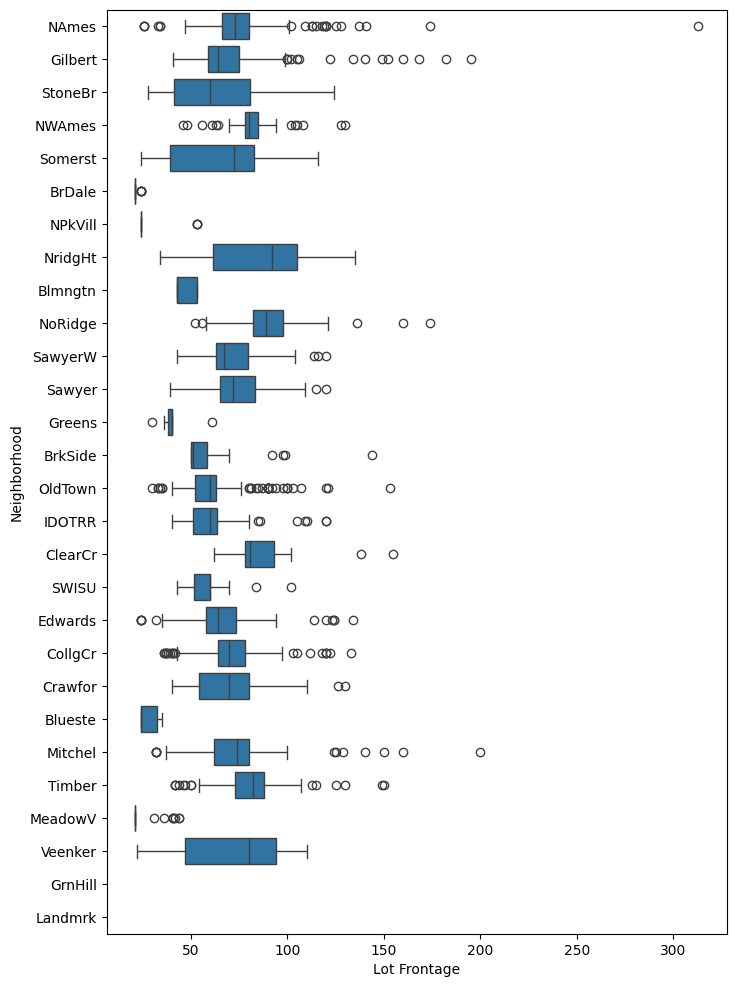

In [ ]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df, orient = 'h')

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

,Lot Frontage
Neighborhood,
Blmngtn,46.900000
Blueste,27.300000
BrDale,21.500000
BrkSide,55.789474
ClearCr,88.150000
CollgCr,71.336364
Crawfor,69.951807
Edwards,64.794286
Gilbert,74.207207


In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean))

In [ ]:
df.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

#Encoding Options

In [ ]:
df = pd.read_csv('/content/sample_data/Ames_NO_Missing_Data.csv')

In [ ]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [ ]:
direction = pd.Series(['Up','Up','Down'])

In [ ]:
pd.get_dummies(direction,drop_first=True)

,Up
0,True
1,True
2,False


In [ ]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
my_object_df = df.select_dtypes(include='object')


In [ ]:
my_numeric_df = df.select_dtypes(exclude='object')


In [ ]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [ ]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2921,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2923,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1)